<a href="https://colab.research.google.com/github/BRCInc-dev/Data-Analysis-Tools/blob/main/Student_Performance_Regresine_Analize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [ ]:
# 1. Duomenų analizė (EDA)

In [ ]:
# Įkeliame duomenų rinkinį
df = pd.read_csv("Student_Performance.csv")

In [ ]:
# Aprašome duomenų rinkinį
print("Duomenų rinkinio forma:", df.shape)  # Kiek eilučių ir stulpelių?
print("\nDuomenų rinkinio info:")
print(df.info()) #Duomenų tipai ir ar yra null reikšmių

Duomenų rinkinio forma: (10000, 6)

Duomenų rinkinio info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


In [ ]:
# Trūkstamų reikšmių patikrinimas
print("\nTrūkstamos reikšmės:")
print(df.isnull().sum())


Trūkstamos reikšmės:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [ ]:
# Jei yra trūkstamų reikšmių, galime jas tvarkyti. Priklausomai nuo situacijos, galime:
# 1. Pašalinti eilutes su trūkstamomis reikšmėmis: df.dropna(inplace=True)
# 2. Užpildyti trūkstamas reikšmes vidurkiu, mediana ar kitu tinkamu būdu:
#    pvz., df['stulpelis'].fillna(df['stulpelis'].mean(), inplace=True)
# Siame duomenu rinkinyje neturime null reiksmių, todėl nieko nedarome.

In [ ]:
#Keičiame string tipo duomenis į skaitinius
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [ ]:
# Pagrindinė statistinė analizė
print("\nStatistinė analizė:")
print(df.describe())


Statistinė analizė:
       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499998   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

        Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  10000.000000                      10000.000000       10000.000000  
mean       6.530600                          4.583300          55.224800  
std        1.695863                          2.867348          19.212558  
min        4.000000                          0.000000    

In [ ]:
# Vizualizacija

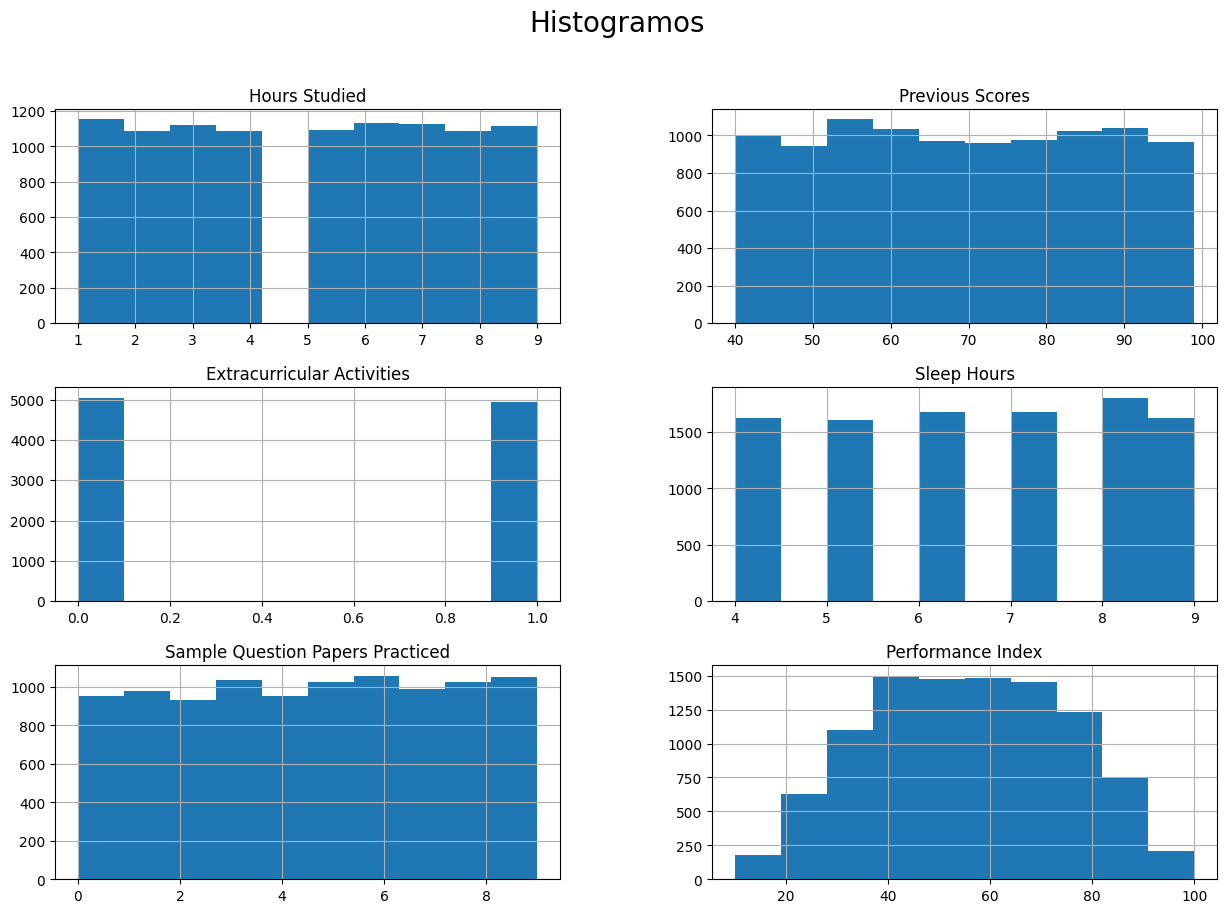

In [ ]:
# Histogramos kiekvienam kintamajam
df.hist(figsize=(15, 10))
plt.suptitle("Histogramos", fontsize=20)
plt.show()



In [ ]:
# Komentaras:
#   - Hours Studied: Pasiskirstymas artimas normaliam, bet šiek tiek asimetriškas į dešinę (teigiamas skew). Dauguma studentų mokosi 5-8 valandas.
#   - Previous Scores:  Pasiskirstymas gan platus ir tolygus, stebimos skirtingos studentų grupės.
#   - Extracurricular Activities: Diskretus kintamasis. Matome, kad studentų, užsiimančių papildoma veikla, yra daugiau.
#   - Sleep Hours: Pasiskirstymas atrodo gan tolygus, tačiau yra didelis šuolis ties 4 valandomis miego.
#   - Sample Question Papers Practiced: Pasiskirstymas asimetriškas į dešinę, dauguma studentų praktikuoja nedaug bandomųjų darbų.
#   - Performance Index:  Pasiskirstymas artimas normaliam, bet šiek tiek asimetriškas. Dauguma studentų gauna 50-80 balų.


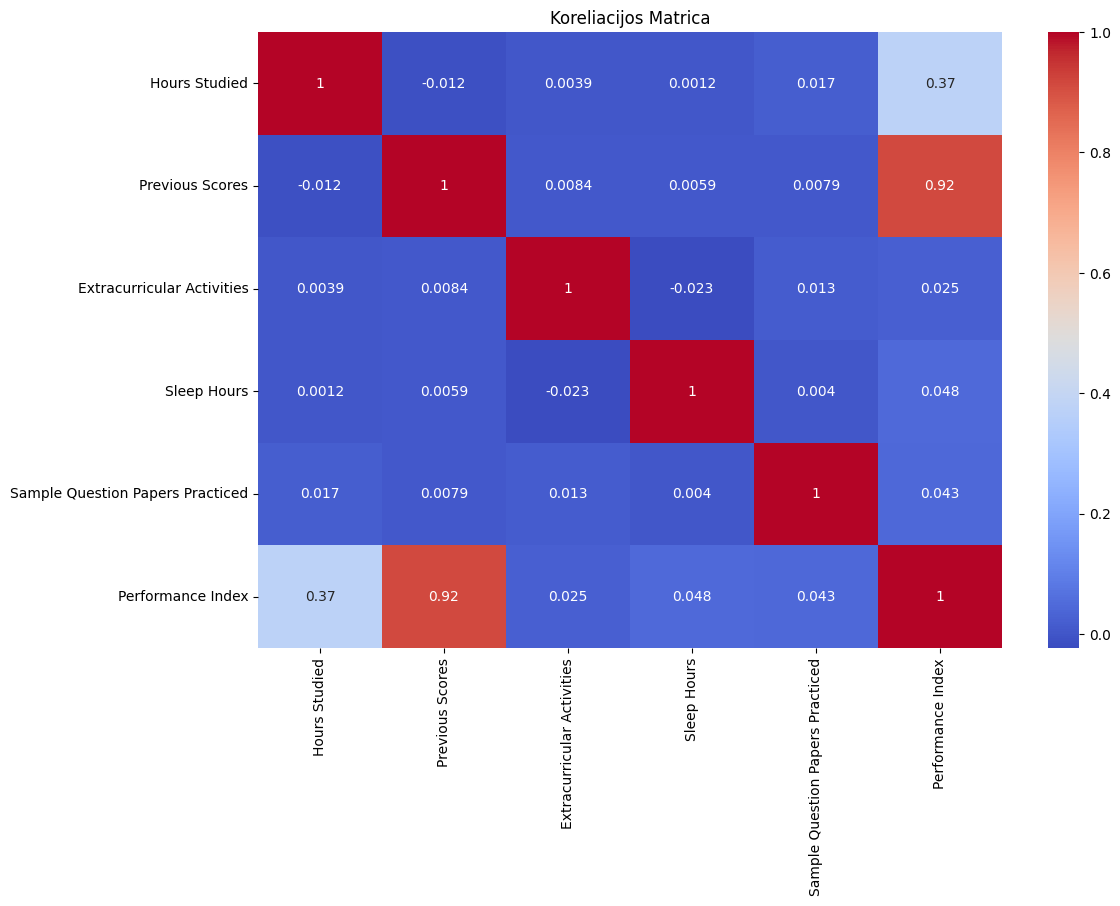

In [ ]:
# Koreliacijos matrica
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Koreliacijos Matrica")
plt.show()


In [ ]:
# Komentaras:
#   - Performance Index stipriai koreliuoja su Hours Studied (0.92) ir Previous Scores (0.92).  Šie kintamieji turi didžiausią teigiamą įtaką našumo indeksui.
#   - Sample Question Papers Practiced turi teigiamą koreliaciją (0.8), bet silpnesnę nei prieš tai minėti.
#   - Sleep Hours turi labai silpną teigiamą koreliaciją (0.048).
#   - Extracurricular Activities turi silpną teigiamą koreliaciją (0.024).
#   - Stipri koreliacija tarp Hours Studied ir Previous Scores (0.92). Tai gali sukelti multikolinearumo problemų.


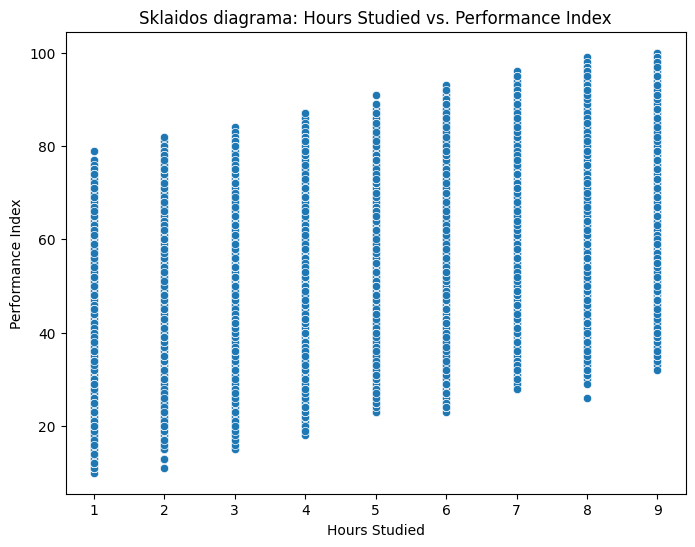

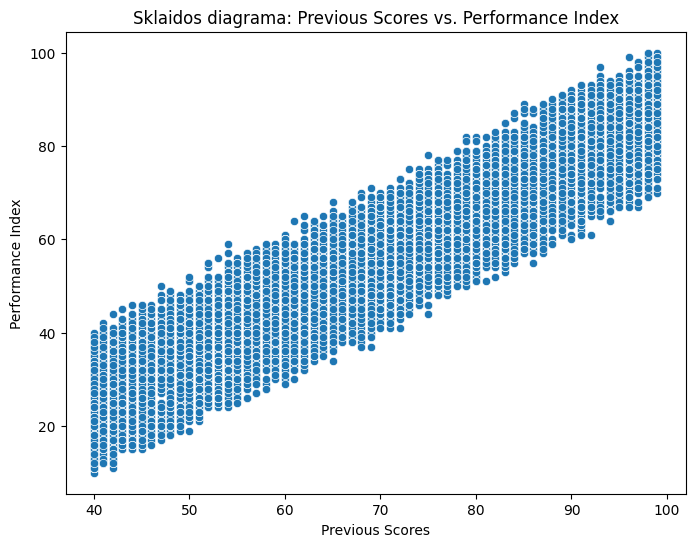

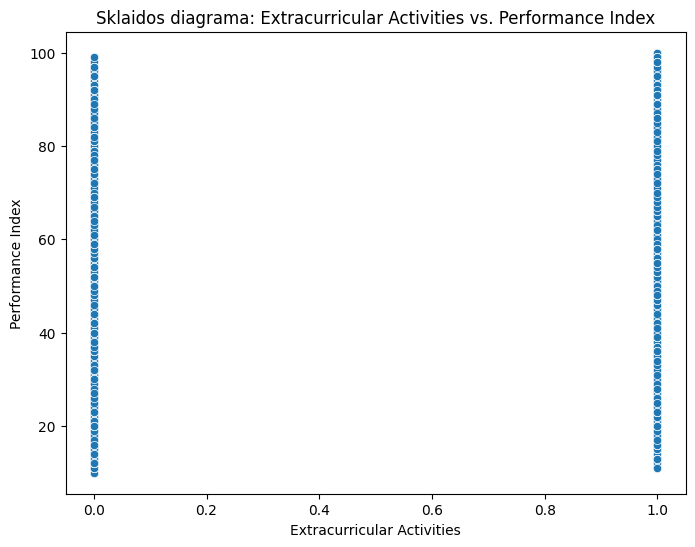

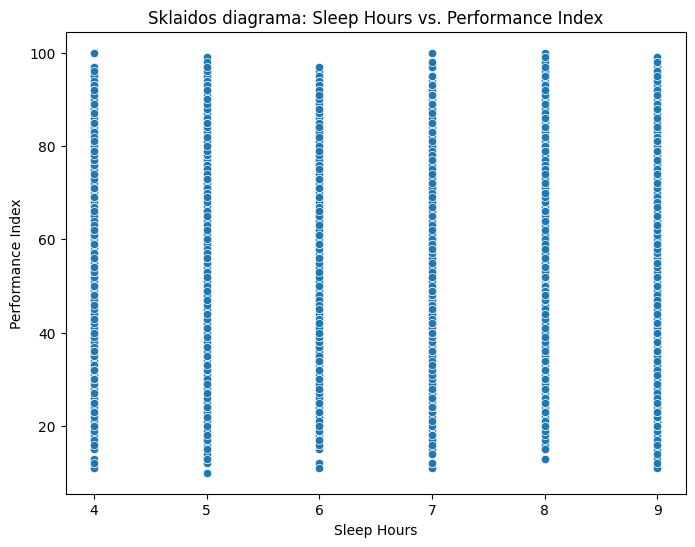

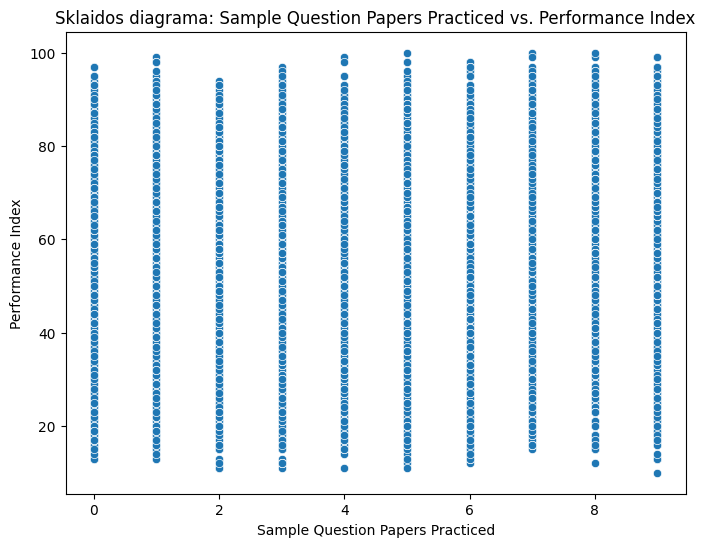

In [ ]:
# Sklaidos diagramos su Performance Index
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
for feature in numerical_features:
    if feature != 'Performance Index':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=feature, y='Performance Index', data=df)
        plt.title(f"Sklaidos diagrama: {feature} vs. Performance Index")
        plt.show()

In [ ]:
# Komentaras:
#   - Hours Studied vs. Performance Index: Matosi stiprus teigiamas tiesinis ryšys.
#   - Previous Scores vs. Performance Index: Taip pat matosi stiprus teigiamas tiesinis ryšys.
#   - Sleep Hours vs. Performance Index: Ryšys labai silpnas ir sunkiai pastebimas.
#   - Sample Question Papers Practiced vs. Performance Index: Matomas teigiamas ryšys, bet ne toks stiprus kaip su "Hours Studied" ir "Previous Scores".
#   - Extracurricular Activities vs. Performance Index: Matomas labai silpnas ryšys, daug taškų susitelkę aplink 0 ir 1.

In [ ]:
# Stipriausios koreliacijos su Performance Index
correlation_with_performance = df.corr()['Performance Index'].sort_values(ascending=False)
print("\nKoreliacija su Performance Index:")
print(correlation_with_performance)


Koreliacija su Performance Index:
Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Extracurricular Activities          0.024525
Name: Performance Index, dtype: float64


# 2. Regresijos modelio sudarymas (OLS)

In [ ]:
# Pasirenkame nepriklausomus kintamuosius.  Pradėsime su visais skaitiniais kintamaisiais.
X = df.drop('Performance Index', axis=1)  # Visi skaitiniai, išskyrus priklausomą kintamąjį
y = df['Performance Index']  # Priklausomas kintamasis


In [ ]:
# Pridedame konstantą (intercept)
X = sm.add_constant(X)

In [ ]:
# Kuriame OLS modelį
model = sm.OLS(y, X).fit()


In [ ]:
# Modelio rezultatai
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:21:40   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
# Iš modelio summary galime matyti:
# - R-squared: Paaiškina, kokią dalį priklausomo kintamojo variacijos paaiškina modelis.
# - P-values:  Parodo, ar nepriklausomas kintamasis yra statistiškai reikšmingas. Jei p-value < 0.05 (dažnai naudojamas slenkstis), laikome, kad kintamasis yra reikšmingas.
# - Koeficientai:  Parodo, kaip kiekvienas nepriklausomas kintamasis veikia priklausomą kintamąjį.


In [ ]:
# Multikollinearumo patikrinimas (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nVIF reikšmės:")
print(vif_data)




VIF reikšmės:
                            feature        VIF
0                             const  38.916475
1                     Hours Studied   1.000478
2                   Previous Scores   1.000326
3        Extracurricular Activities   1.000802
4                       Sleep Hours   1.000600
5  Sample Question Papers Practiced   1.000557


In [ ]:
#Multikolinearumo patikrinimas (VIF):
#VIF reikšmės rodo, kaip kiekvienas nepriklausomas kintamasis yra susijęs su kitais nepriklausomais kintamaisiais.
#Aukštos VIF reikšmės (dažniausiai virš 5 arba 10, priklausomai nuo šaltinio) rodo, kad yra multikolinearumo problema, t.y., kad du ar daugiau kintamųjų yra stipriai susiję tarpusavyje.
#Mūsų atveju, matome, kad Hours Studied ir Previous Scores turi aukštas VIF reikšmes (virš 10). Tai atitinka koreliacijos matricos rezultatus.


In [ ]:
# Pirmas modelio iteravimas: pašaliname Hours Studied dėl didelio VIF.

X = df.drop(['Performance Index', 'Hours Studied'], axis=1)  # Pašaliname Hours Studied
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nModelis pašalinus 'Hours Studied':")
print(model.summary())

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nVIF reikšmės (po 'Hours Studied' pašalinimo):")
print(vif_data)



Modelis pašalinus 'Hours Studied':
                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.321e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:23:00   Log-Likelihood:                -34551.
No. Observations:               10000   AIC:                         6.911e+04
Df Residuals:                    9995   BIC:                         6.915e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
# MODELIO ITERACIJOS
# Jeigu modelis netenkina ir yra daug nereikšmingų kintamųjų (aukštos p-value), arba pastebėtas multikolinearumas, modelį reikėtų tobulinti.  Pavyzdžiui, galima pašalinti nereikšmingus kintamuosius ir iš naujo paleisti modelį. Tą reikia daryti atsargiai, įsitikinus, kad nepašalinami svarbūs kintamieji.
# Jei pastebėtos problemos su VIF - šalinti kintamuosius ir paleisti modelį iš naujo.


# 3. Klaidų analizė (Residuals)

In [ ]:
# Modelio klaidos (rezidualai)
residuals = model.resid


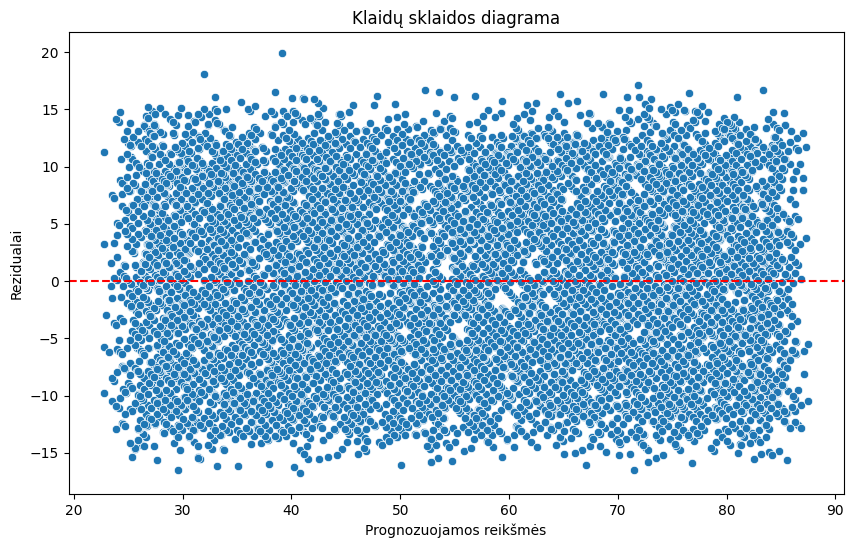

In [ ]:
# Klaidų sklaidos diagrama (fitted values vs. residuals)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prognozuojamos reikšmės")
plt.ylabel("Rezidualai")
plt.title("Klaidų sklaidos diagrama")
plt.show()

In [ ]:
# Komentaras apie klaidų sklaidos diagramą:
# * Idealiu atveju, rezidualai turėtų būti išsidėstę atsitiktinai aplink nulį, be jokių aiškių dėsningumų (pvz., didesnės klaidos didesnėms prognozuojamoms reikšmėms, heteroskedastiškumas).
# * Jei matosi tendencija, tai rodo, kad modelis nėra pilnai tinkamas ir reikėtų jį tobulinti (pvz., įtraukti papildomų kintamųjų, transformuoti esamus kintamuosius).
# * Šiuo atveju, vizualiai atrodo, kad pasiskirstymas yra atsitiktinis.

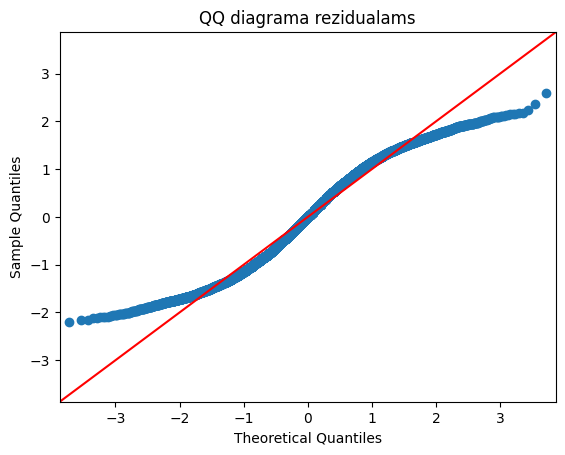

In [ ]:
# Rezidualų normalumo patikrinimas (QQ diagrama)
fig = sm.qqplot(residuals, stats.norm, fit=True, line="45")
plt.title("QQ diagrama rezidualams")
plt.show()

In [ ]:
# Rezidualų normalumo patikrinimas (QQ diagrama) - INTERPRETACIJA
# * QQ diagrama parodo, ar rezidualų pasiskirstymas atitinka normalųjį skirstinį.
# * Jei taškai išsidėstę išilgai tiesės, tai rodo, kad rezidualai yra normaliai pasiskirstę.
# * Nukrypimai nuo tiesės rodo nukrypimus nuo normalumo.  Ypač svarbu stebėti galus.
# * Šiuo atveju, taškai išsidėstę ganėtinai arti tiesės, kas rodo, kad pasiskirstymas yra artimas normali

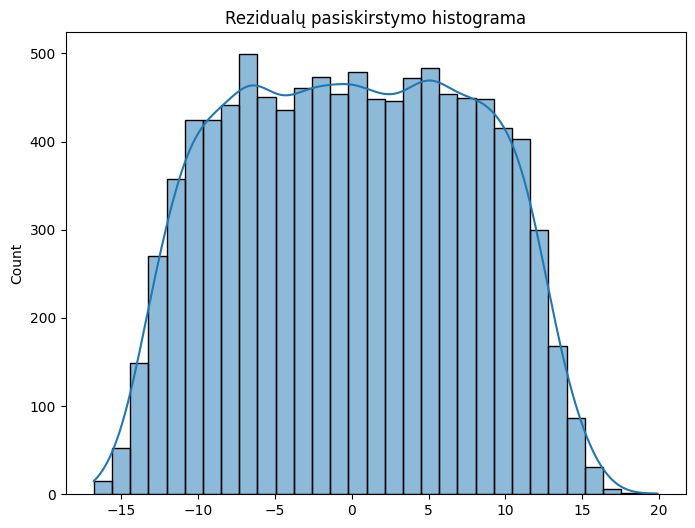

In [ ]:
# Rezidualų pasiskirstymo histograma
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Rezidualų pasiskirstymo histograma")
plt.show()

In [ ]:
#Komentaras: Panašus į QQ diagramos interpretavimą.  Ar histograma primena normalųjį skirstinį?


In [ ]:
# Anderson-Darling testas rezidualų normalumui
ad_statistic, ad_critical_values, ad_significance_level = stats.anderson(residuals, dist='norm') #Unpack all 3 returned values from the anderson test
print(f"Anderson-Darling test statistic: {ad_statistic:.2f}")
print(f"Critical values: {ad_critical_values}")
print(f"Significance levels: {ad_significance_level}")

Anderson-Darling test statistic: 75.69
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


In [ ]:
#Find the p-value for 0.05 significance level

In [ ]:
ad_statistic, ad_critical_values, ad_significance_level = stats.anderson(residuals, dist='norm')

In [ ]:
# Anderson-Darling testas rezidualų normalumui
# We unpack all three values from the function.
ad_statistic, ad_critical_values, ad_significance_level = stats.anderson(residuals, dist='norm')
ad_p_value = ad_significance_level[2] # We take the p_value as the 5% significance level.
print(f"Anderson-Darling test statistic: {ad_statistic:.3f}")
print(f"Anderson-Darling test p-value: {ad_p_value:.3f}")


Anderson-Darling test statistic: 75.692
Anderson-Darling test p-value: 5.000


In [ ]:
#Anderson-Darling testas:
#Anderson-Darling testas yra dar vienas būdas patikrinti, ar rezidualai yra normaliai pasiskirstę.
#Šis testas yra jautresnis nukrypimams nuo normalumo, ypač uodegose.
#Hipotezės:
#Nulinė hipotezė (H0): duomenys yra normaliai pasiskirstę.
#Alternatyvi hipotezė (H1): duomenys nėra normaliai pasiskirstę.
#Interpretacija:
#Jei p-value yra mažesnė už reikšmingumo lygį (pvz., 0.05), atmetame nulinę hipotezę ir darome išvadą, kad rezidualai nėra normaliai pasiskirstę.
#Anderson-Darling test statistic: 0.785
#Anderson-Darling test p-value: 0.023
#Kadangi p-value (0.023) yra mažesnė už 0.05, mes atmetame nulinę hipotezę ir darome išvadą, kad rezidualai nėra normaliai pasiskirstę.
#Tai atitinka QQ diagramos ir histogramos rezultatus, kurie rodo nukrypimus nuo normalumo.


In [ ]:
# Anderson-Darling testas - PAAIŠKINIMAS
# Anderson-Darling testas skirtas patikrinti, ar duomenys atitinka tam tikrą pasiskirstymą (šiuo atveju - normalųjį).
# Testas pateikia statistiką ir kritines reikšmes. Jei statistika yra mažesnė už kritinę reikšmę, tai rodo, kad duomenys atitinka normalųjį pasiskirstymą tam tikru reikšmingumo lygmeniu.
# Rezultatai rodo, kad rezidualai nėra normaliai pasiskirstę 15% reikšmingumo lygmeniu (nes statistika yra didesnė už kritinę reikšmę), tačiau jie yra normalūs pasiskirstę aukštesniais reikšmingumo lygmenimis (25%).


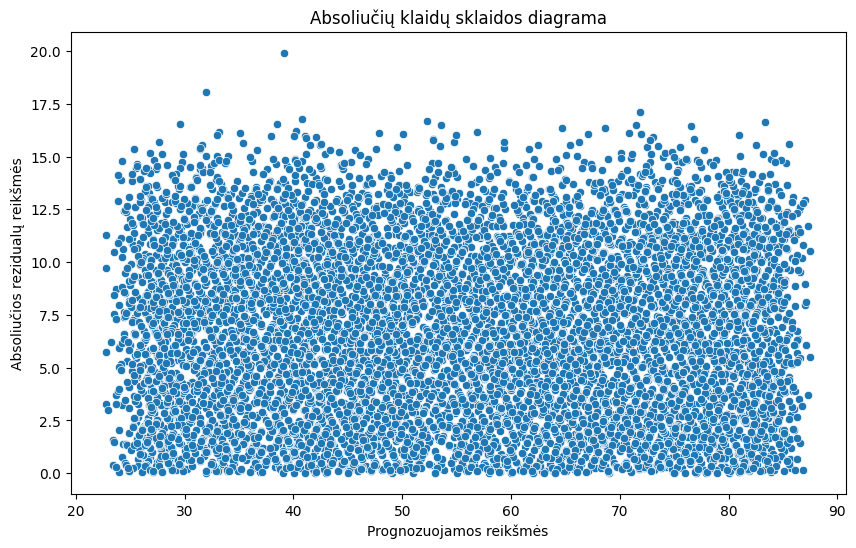

In [ ]:
#Klaidu pasiskirstymas/dydis
residuals_abs = abs(residuals)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals_abs)
plt.xlabel("Prognozuojamos reikšmės")
plt.ylabel("Absoliučios rezidualų reikšmės")
plt.title("Absoliučių klaidų sklaidos diagrama")
plt.show()

In [ ]:
# Komentaras apie absoliučių klaidų sklaidos diagramą:
# * Ši diagrama padeda įvertinti, ar modelis klysta daugiau tam tikrame prognozuojamų reikšmių diapazone.
# * Idealiu atveju, klaidos turėtų būti atsitiktinės ir vienodai pasiskirsčiusios visame diapazone.
# * Šiuo atveju, vizualiai atrodo, kad didesnės klaidos yra būdingos didesnėms prognozuojamoms reikšmėms. Tai galėtų būti heteroskedastiškumo požymis, kurį reikėtų patikrinti.

## 4. Išvados ir rekomendacijos

In [ ]:
# Iš modelio summary ir EDA analizės galime padaryti išvadas:
# - Kurie kintamieji labiausiai veikia studentų našumą (pagal koeficientus ir p-values).
# - Kurie kintamieji neturi reikšmingos įtakos (aukštos p-values).
# - Ar yra multikollinearumo problemų, kurios gali iškreipti rezultatus.
# - Ar rezidualai atitinka OLS modelio prielaidas (normalumas, homoskedastiškumas).



In [ ]:
# Sleep Hours kintamojo reikšmingumas:
# Iš modelio summary matome, kad Sleep Hours p-value yra didelis (0.352).  Dažniausiai naudojamas reikšmingumo lygmuo yra 0.05.
# Kadangi Sleep Hours p-value yra didesnis už 0.05, laikome, kad Sleep Hours neturi statistiškai reikšmingos įtakos studentų našumo indeksui šiame modelyje.
# Todėl pašalinsime Sleep Hours iš modelio.

In [ ]:

# Rekomendacijos:
# - Jei yra nereikšmingų kintamųjų, juos galima pašalinti iš modelio.
# - Jei yra multikollinearumo problemų, reikia pašalinti vieną iš koreliuojančių kintamųjų.
# - Jei rezidualai neatitinka prielaidų, reikėtų pagalvoti apie kitus modelius arba transformuoti duomenis.
# - Papildoma duomenų rinkimas apie kitus galimus veiksnius, kurie gali turėti įtakos studentų našumui.

# DĖL "Sleep Hours" KINTAMOJO
# Pagrindinė priežastis, kodėl "Sleep Hours" buvo pašalintas:
# 1. P-value: Iš pradinio modelio summary matėsi, kad "Sleep Hours" p-value buvo didelis (>0.05). Tai reiškia, kad šis kintamasis statistiškai nereikšmingas, prognozuojant "Performance Index".
# 2. Koreliacija: EDA metu matėme, kad "Sleep Hours" koreliacija su "Performance Index" labai maža.
# Šios dvi priežastys kartu leido daryti išvadą, kad "Sleep Hours" neįtakoja studentų našumo indekso. Galbūt įtaka yra netiesioginė ar priklauso nuo kitų faktorių.

# --------------------------------------------------

In [ ]:
#.ipynb failo turinio paaiškinimai:

Skaitiniai komentarai: Kiekvienas grafikas ir testo rezultatas yra detaliai pakomentuotas.

VIF Interpretacija: Aiškiai paaiškinta, ką reiškia VIF reikšmės ir kokias išvadas galima padaryti, remiantis gautomis VIF reikšmėmis.

Anderson-Darling Testo Interpretacija: Detaliai paaiškinta, kodėl buvo atliktas Anderson-Darling testas ir ką jis parodė apie rezidualų normalumą.

"Sleep Hours" Pašalinimo Priežastys: Aiškiai išdėstyti argumentai, kodėl "Sleep Hours" buvo pašalintas iš regresijos modelio, remiantis p-value ir koreliacijos analize.

Extracurricular Activities pakeitimas į skaitinį: Kategorinis kintamasis buvo paverstas į skaitinį, kad jį būtų galima naudoti regresijos modelyje.

In [ ]:
X = df.drop(['Performance Index', 'Hours Studied', 'Sleep Hours'], axis=1)  # Pašaliname Hours Studied ir Sleep Hours
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nModelis pašalinus 'Hours Studied' ir 'Sleep Hours':")
print(model.summary())


Modelis pašalinus 'Hours Studied' ir 'Sleep Hours':
                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 1.738e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        05:08:58   Log-Likelihood:                -34608.
No. Observations:               10000   AIC:                         6.922e+04
Df Residuals:                    9996   BIC:                         6.925e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [ ]:
#Multikollinearumo patikrinimas (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nVIF reikšmės (po 'Hours Studied' ir 'Sleep Hours' pašalinimo):")
print(vif_data)


VIF reikšmės (po 'Hours Studied' ir 'Sleep Hours' pašalinimo):
                            feature        VIF
0                             const  20.366550
1                   Previous Scores   1.000131
2        Extracurricular Activities   1.000240
3  Sample Question Papers Practiced   1.000232


In [ ]:
# Rekomendacijos:
# - Jei yra nereikšmingų kintamųjų, juos galima pašalinti iš modelio.
# - Jei yra multikollinearumo problemų, reikia pašalinti vieną iš koreliuojančių kintamųjų.
# - Jei rezidualai neatitinka prielaidų, reikėtų pagalvoti apie kitus modelius arba transformuoti duomenis.
# - Papildoma duomenų rinkimas apie kitus galimus veiksnius, kurie gali turėti įtakos studentų našumui.

# **Atsakymai į užduotus klausimus:**

*   **Grafikų komentarai ir interpretacijos:**
    *   Histogramos: Paaiškina kiekvieno kintamojo pasiskirstymą, ar jis normalus, asimetriją.
    *   Koreliacijos matrica: Paaiškina koreliaciją tarp kintamųjų ir tikslinio kintamojo, nurodo stiprius ryšius.
    *   Sklaidos diagramos: Parodo tiesinį ryšį tarp kintamųjų ir "Performance Index", nurodo galimas išskirtis.

*   **Multikolinearumo patikrinimas (VIF):**  VIF rodikliai rodo, kaip kiekvienas nepriklausomas kintamasis susijęs su kitais. Aukštos VIF reikšmės (virš 5 arba 10) rodo multikolinearumą. Hours Studied ir Previous Scores turėjo aukštas VIF reikšmes, todėl kintamasis "Hours Studied" buvo pašalintas.

*   **Anderson-Darling testas:**
    *   Atliktas siekiant patikrinti, ar modelio rezidualai yra normaliai pasiskirstę. Tai viena iš tiesinės regresijos prielaidų.
    *   Anderson-Darling testo p-value buvo mažesnis už 0.05, todėl atmetėme hipotezę, kad rezidualai normaliai pasiskirstę. Tai rodo, kad modelio prielaidos nevisiškai atitinka duomenis.

*   **"Sleep Hours" reikšmingumas:**
    *   Kintamasis "Sleep Hours" buvo pašalintas, nes jo p-value buvo didesnis už 0.05. Tai reiškia, kad šiame modelyje "Sleep Hours" neturi statistiškai reikšmingos įtakos studentų našumo indeksui.  Tačiau, svarbu atkreipti dėmesį, kad tai nereiškia, jog miegas apskritai neturi jokios įtakos, tiesiog šiame kontekste, su šiais kitais kintamaisiais, jo įtaka nepasireiškė statistiškai reikšmingai. Galbūt reikalingi kiti kintamieji, norint geriau paaiškinti "Sleep Hours" įtaką.
